### Build a multiple linear regression model for the prediction of demand for shared bikes

#### Problem Statement: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
The company want to understand the factors affecting the demand for these shared bikes in the American market. 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Requirement is to model the demand for shared bikes with the available independent variables. 


### Step 1: Reading and Understanding the Data

In [1474]:
#importing a few of the libraries that would be needed for data cleaning and visual presentations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use("classic")
sns.set_palette("deep")

#### Load the dataset

In [1475]:
bike_df = pd.read_csv("day.csv")

##### - Metadata analysis of the loaded data

In [1476]:
print('Number of rows# ', bike_df.shape[0])
print('Number of cols#' ,bike_df.shape[1])
print("--------------------------")
bike_df.info()

Number of rows#  730
Number of cols# 16
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### --The dataset is having 730 records with 16 columns. There are no missing values in any columns and most of the data is numeric

In [1477]:
bike_df.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1478]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### - Analysis of the loaded data 

In [1479]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### - Read through the data dictionary

In [1480]:
bike_datadict = open("Readme.txt",'r')
bike_datadict.readlines()

['=========================================\n',
 'Dataset characteristics\n',
 '=========================================\t\n',
 'day.csv have the following fields:\n',
 '\t\n',
 '\t- instant: record index\n',
 '\t- dteday : date\n',
 '\t- season : season (1:spring, 2:summer, 3:fall, 4:winter)\n',
 '\t- yr : year (0: 2018, 1:2019)\n',
 '\t- mnth : month ( 1 to 12)\n',
 '\t- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)\n',
 '\t- weekday : day of the week\n',
 '\t- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n',
 '\t+ weathersit : \n',
 '\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n',
 '\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n',
 '\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n',
 '\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n',
 '\t- temp : temperature in Celsius\n',
 '\t- atemp: feeling

##### - create different variables to hold categorical and numeric data

In [1481]:
cat_cols = ['season','holiday','weekday','workingday','weathersit']
num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [1482]:
bike_df[num_cols].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Visualising the Data

#### - Univariate Analysis

In [1483]:
def uni_plt(data,col):
    fig, axes=plt.subplots(1,2,sharex=False,figsize=(14,3))
    sns.distplot(data[col],kde=True,ax=axes[0])
    sns.boxplot(x=data[col],ax=axes[1])
    axes[0].set_xlabel(" ".join(col.split('_')).title())
    axes[1].set_xlabel(" ".join(col.split('_')).title())
    plt.tight_layout()
    plt.show()

#### Looking at numeric variables and their distribution

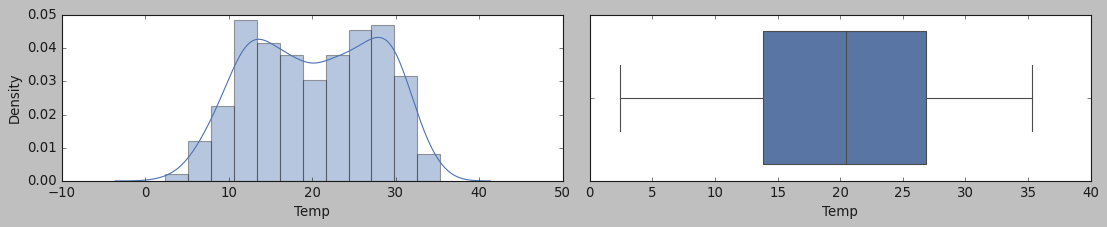

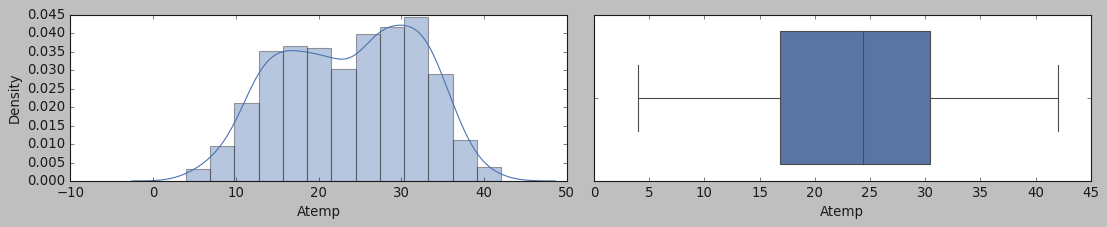

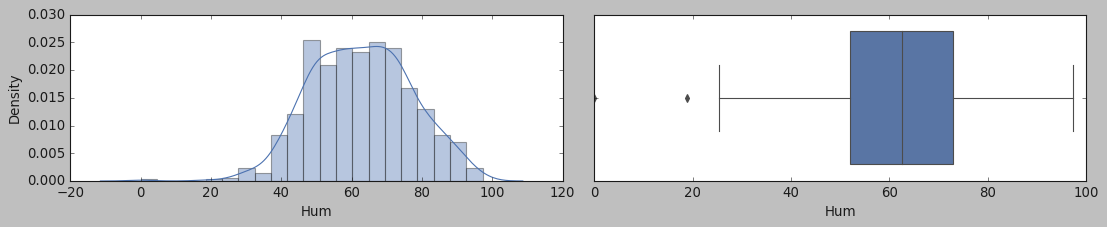

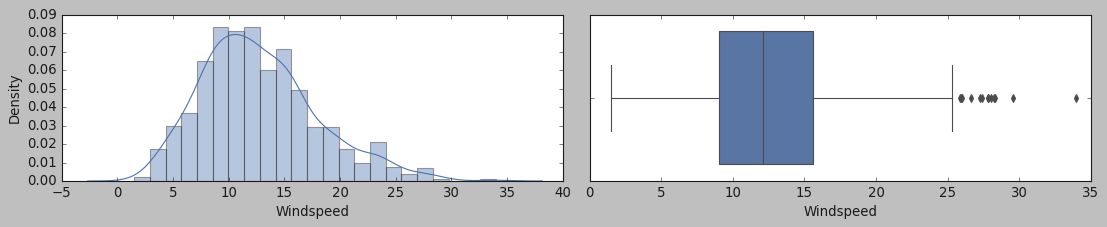

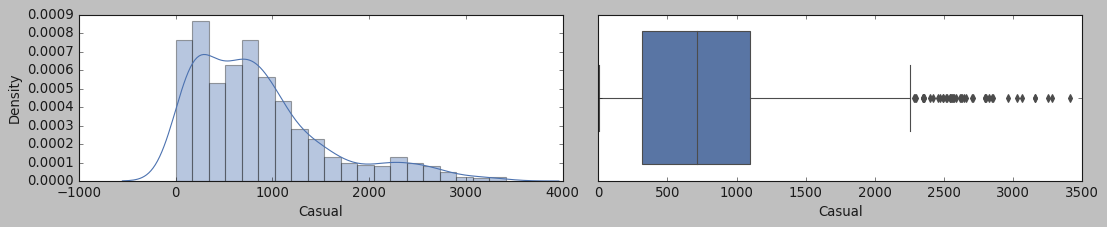

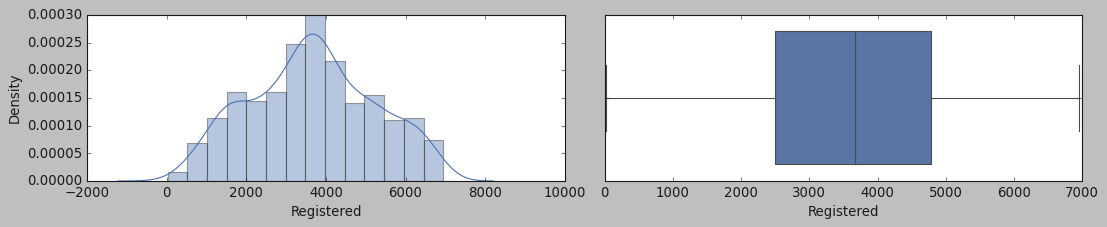

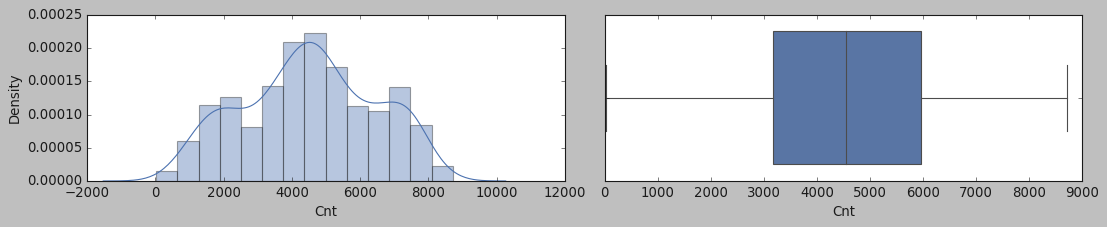

In [1484]:
for i in num_cols:
  uni_plt(bike_df,i)
  plt.show()


Most of the variables are properly distributed except casual which seems to have a lot of outliers at the upper end. It is better to be careful while using it in the model

#### Looking at categorical variables

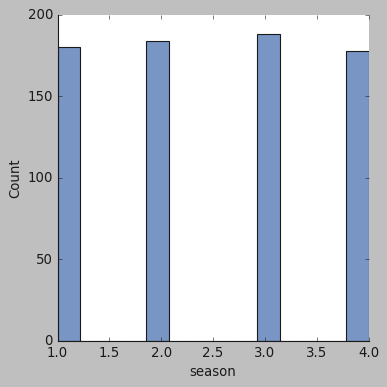

<Figure size 1200x160 with 0 Axes>

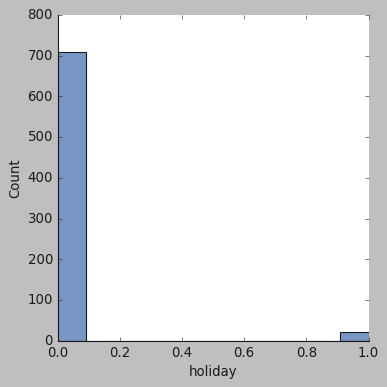

<Figure size 1200x160 with 0 Axes>

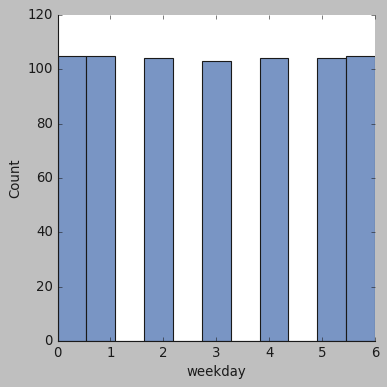

<Figure size 1200x160 with 0 Axes>

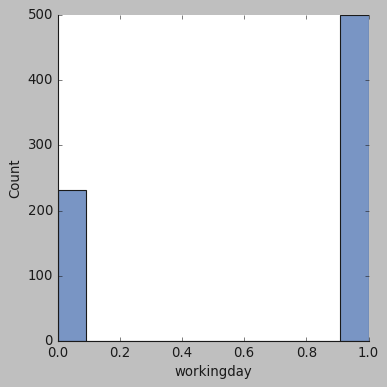

<Figure size 1200x160 with 0 Axes>

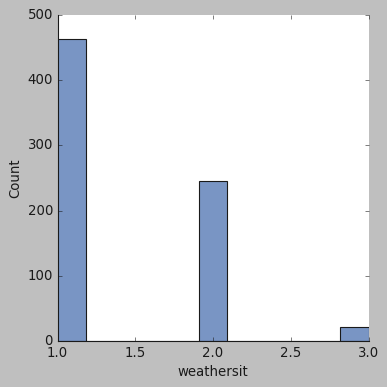

<Figure size 1200x160 with 0 Axes>

In [1485]:
for i in cat_cols:
  sns.displot(bike_df[i])
  plt.xlabel(i)
  plt.figure(figsize=(15,2))
  plt.show()

On heavy rain days, there is no demand at all as weathersit=4 has no data. The dataset has information on all the 4 seasons. 

#### - Multi-Variate Analysis

##### - Looking at the effect on the target variable(cnt) based on different categorical variables

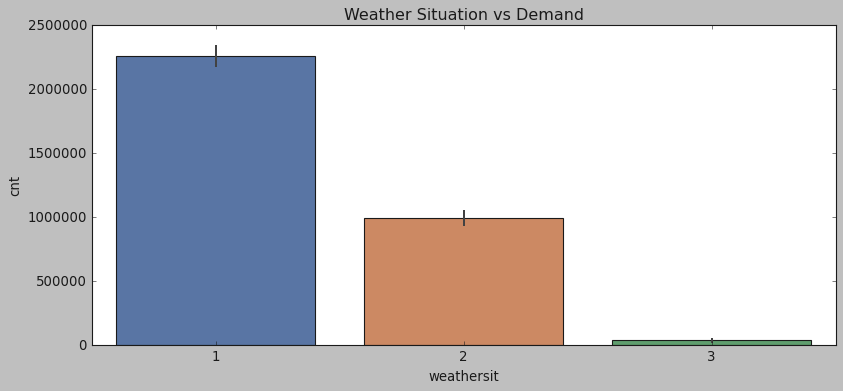

In [1486]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.weathersit,y=bike_df.cnt,estimator = np.sum)
plt.title("Weather Situation vs Demand")
plt.show()

 - The highest demand for the bikes is when the weather is 1 <i>(Clear, Few clouds, Partly cloudy, Partly cloudy)</i>. Next comes 2 <i>(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)</i> and then 3 <i>(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)</i> while no data for 4<i>(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

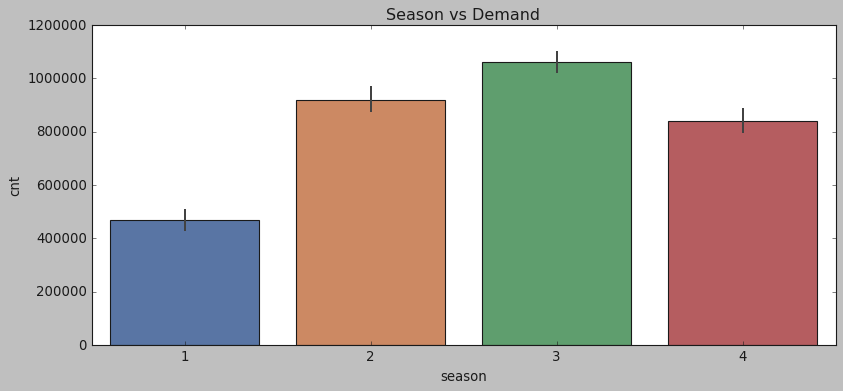

In [1487]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.season,y=bike_df.cnt,estimator = np.sum)
plt.title("Season vs Demand")
plt.show()

- In terms of season, Fall has the top demand for bikes. Then there is summer, winter and spring respectively.

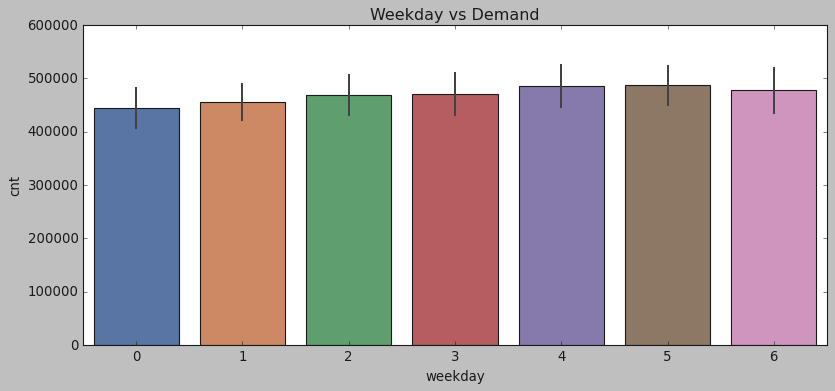

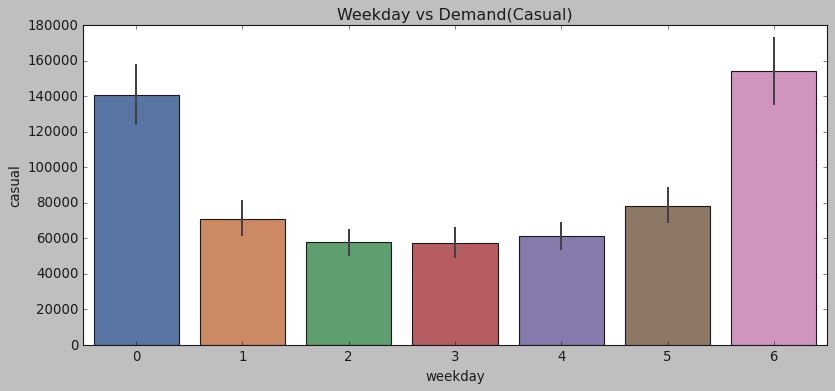

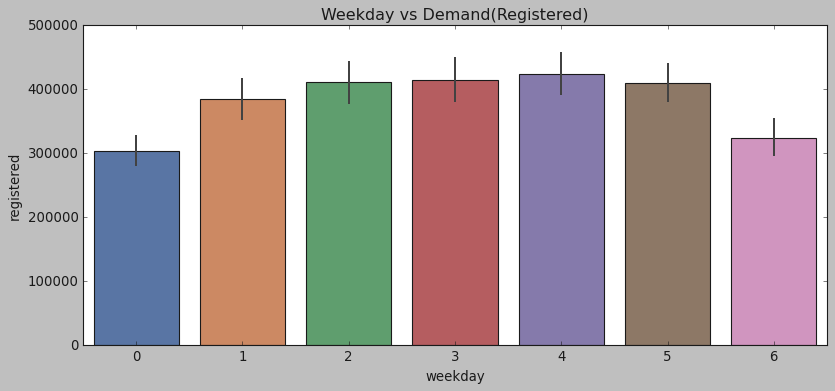

In [1488]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.weekday,y=bike_df.cnt,estimator = np.sum)
plt.title("Weekday vs Demand")
plt.show()

fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.weekday,y=bike_df.casual,estimator = np.sum)
plt.title("Weekday vs Demand(Casual)")
plt.show()

fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.weekday,y=bike_df.registered,estimator = np.sum)
plt.title("Weekday vs Demand(Registered)")
plt.show()

- There is almost the same demand for bikes throughout the week. The caual users are more in the weekends while registered users are more in the weekdays.

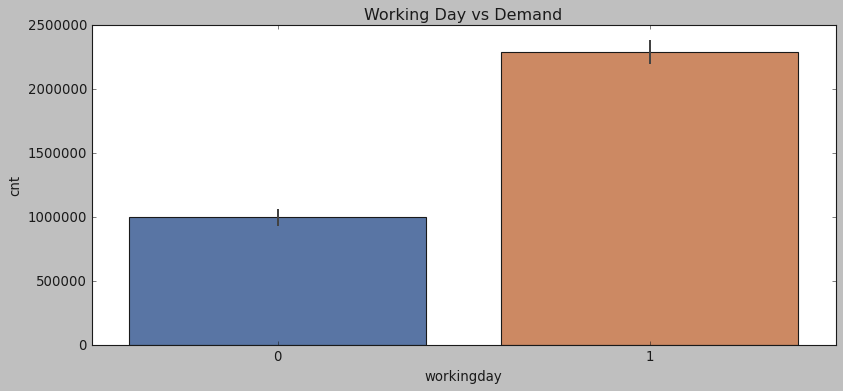

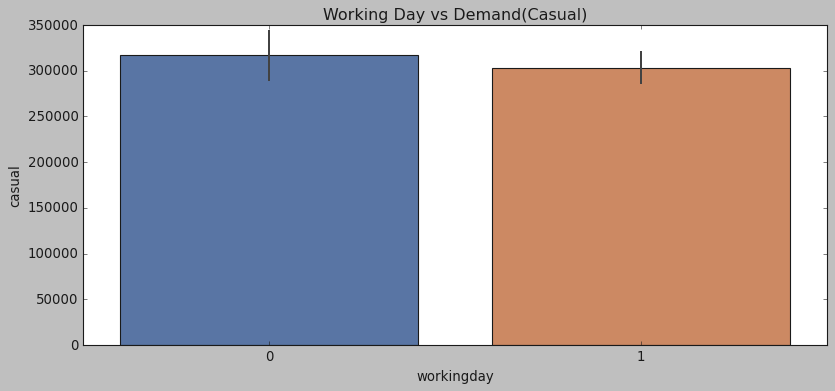

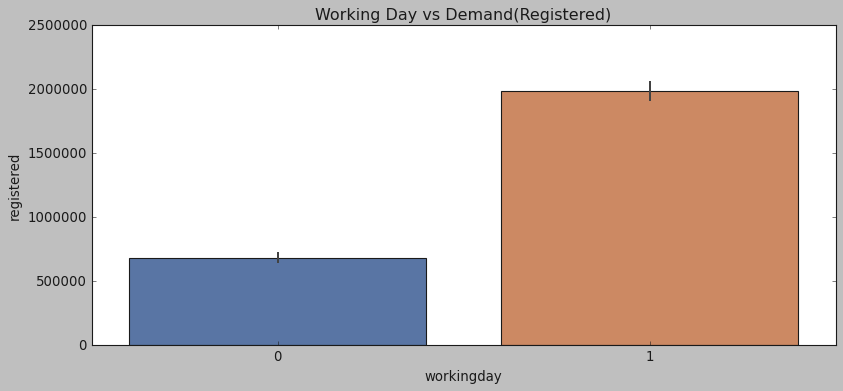

In [1489]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.workingday,y=bike_df.cnt,estimator = np.sum)
plt.title("Working Day vs Demand")
plt.show()

fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.workingday,y=bike_df.casual,estimator = np.sum)
plt.title("Working Day vs Demand(Casual)")
plt.show()

fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.workingday,y=bike_df.registered,estimator = np.sum)
plt.title("Working Day vs Demand(Registered)")
plt.show()

- Working day is a good day for the bike-sharing company as demand is high. For causl users, there is not much difference

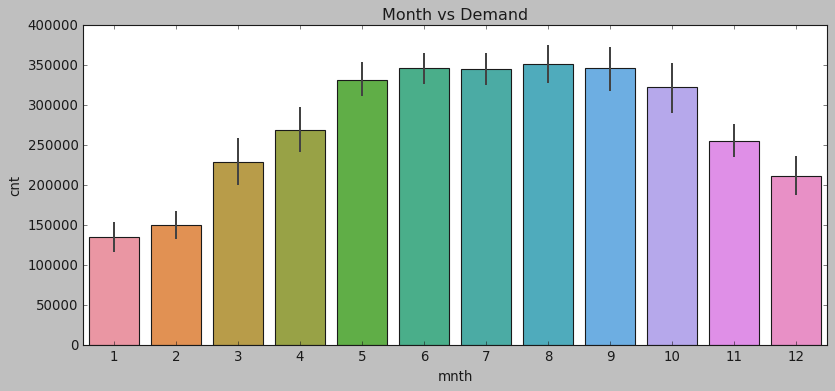

In [1453]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.mnth,y=bike_df.cnt,estimator = np.sum)
plt.title("Month vs Demand")
plt.show()

- In terms of month of the year , May to Oct months are good

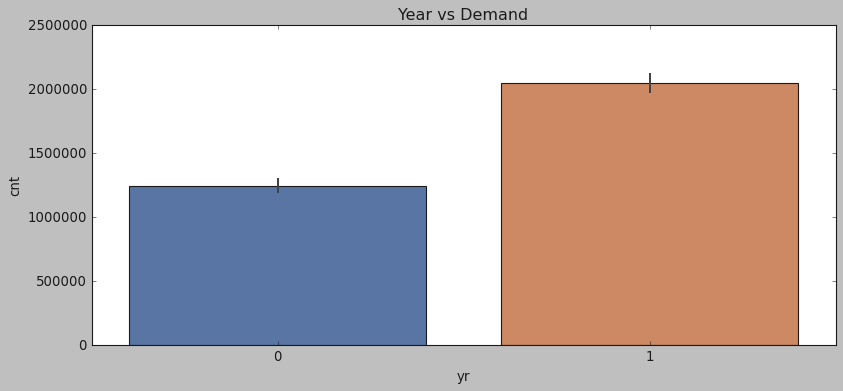

In [1454]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.yr,y=bike_df.cnt,estimator = np.sum)
plt.title("Year vs Demand")
plt.show()

- Compared to 2018, the following year 2019, there has been good demand for the bikes(almost double). This shows that bike sharing is gaining popularity in the American market.

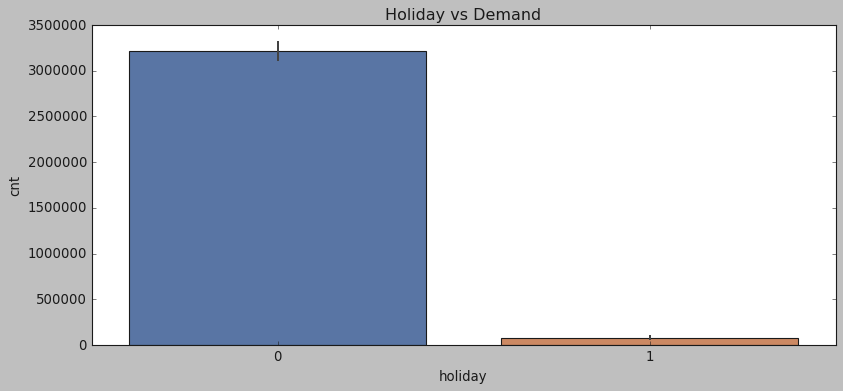

In [1455]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x=bike_df.holiday,y=bike_df.cnt,estimator = np.sum)
plt.title("Holiday vs Demand")
plt.show()

- Holidays dont generate much demand for bikes

#### - Looking at the pairs of numeric data

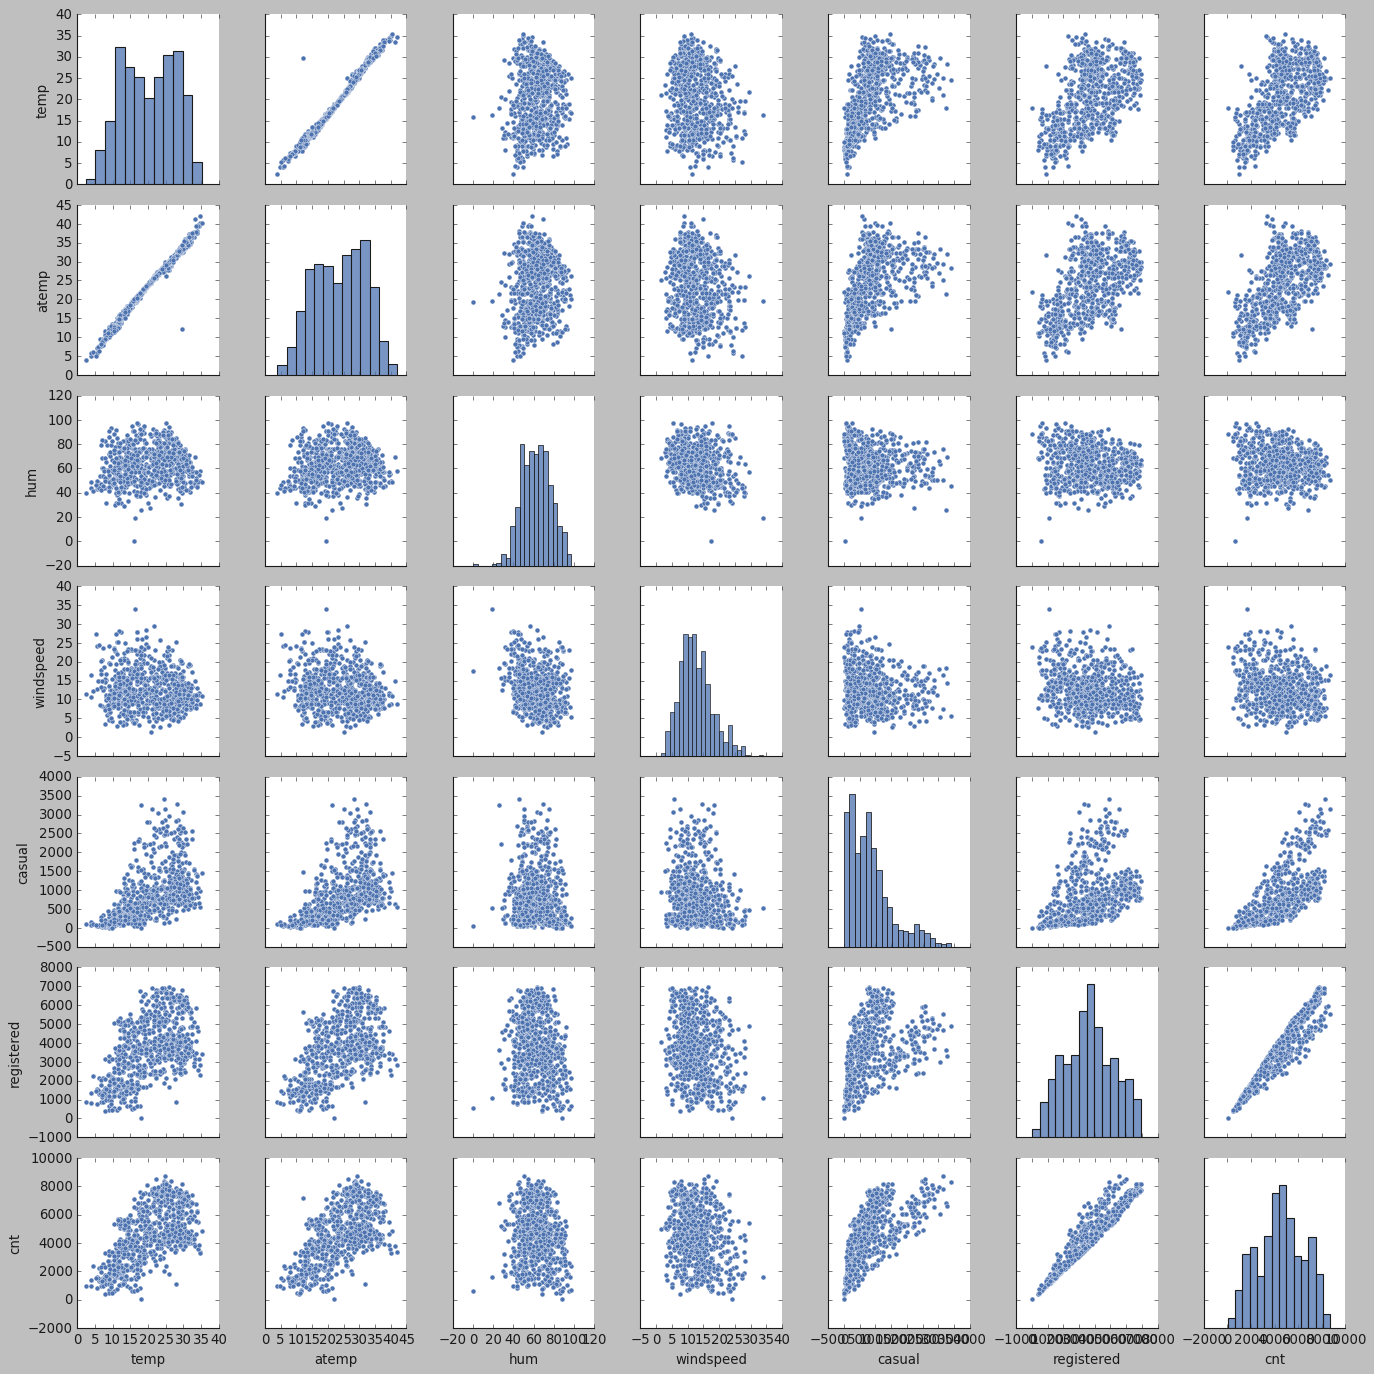

In [1394]:
sns.pairplot(bike_df[num_cols])

- The dependent variable(cnt) and its relation with causal and registered users are linear. As well as temp and feeling temp(atemp) is some what linear to cnt. Humidity and windspeed, the pattern is not very clear.
- Temp and aTemp seems to have the same pattern

#### - Looking at numeric variables in specific categories

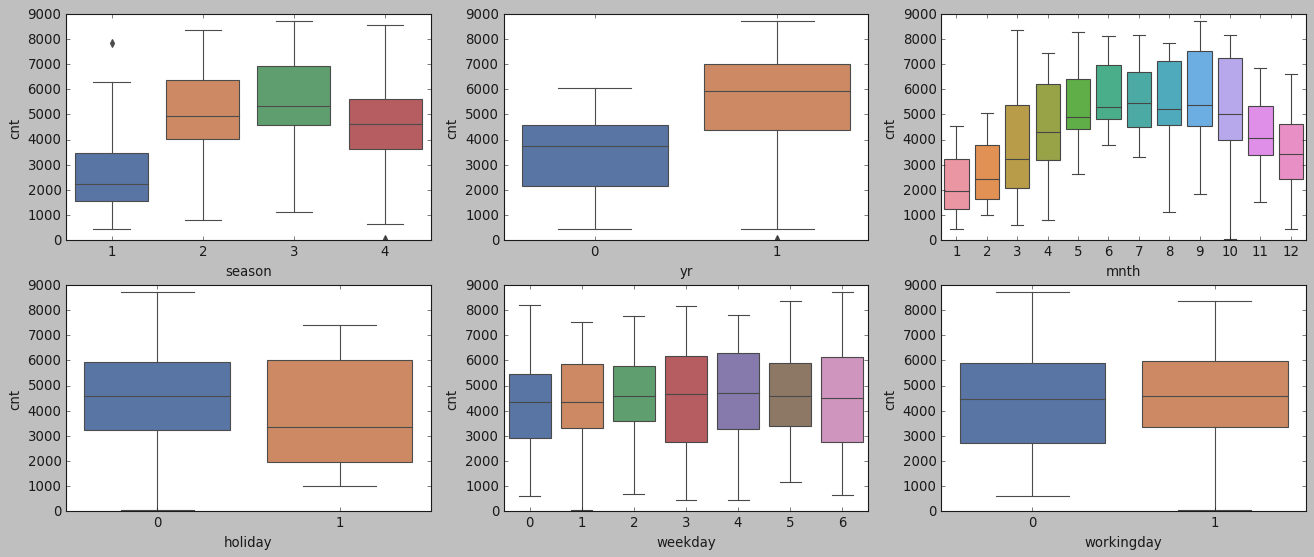

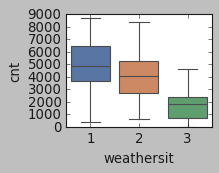

In [1395]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()
plt.subplot(3,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

### Step 3: Data Preparation

In [1396]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1397]:
corrs=bike_df.corr()

In [1398]:
corrs.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764


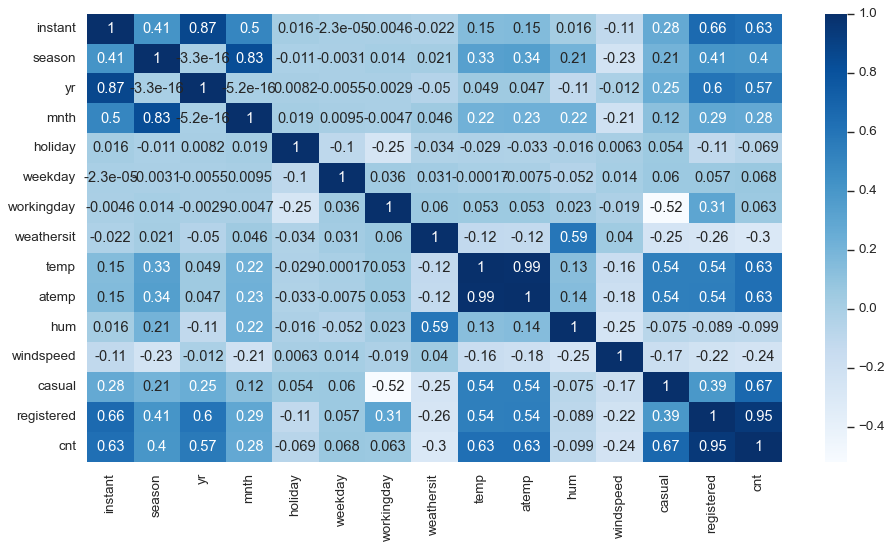

In [1399]:
sns.set(font_scale=1.1)
plt.figure(figsize=(14,7))
sns.heatmap(corrs,annot=True,cmap='Blues')
plt.xticks(rotation=90)
plt.show()

- registered number is highly collinear with cnt hence dropping it
- temp and atemp also seem to be conveying the same message hence dropping one
- season and month have as 0.83 high correlation, should keep only one of them


In [1457]:
bike_df.drop(['temp','registered','mnth'], axis=1, inplace=True)

In [1458]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
casual        605
cnt           695
dtype: int64

### Preprocessing Steps - Creating dummy variables

In [1459]:
bike_mod=pd.get_dummies(bike_df,columns=["season"],dtype=int, drop_first=True)

In [1460]:
bike_mod=pd.get_dummies(bike_mod,columns=["weathersit"],dtype=int, drop_first=True)

#### The year 2020 is when the demand needs to be predicted hence converting the 0,1 representation to actual values for 2018/2019.

In [1461]:
bike_mod['yr']= bike_mod['yr'].apply(lambda x: 2019 if x==1 else 2018 )

#### - dropping the unwanted columns like the rownumber or instant and date which is represented in terms of year and month already

In [1462]:
bike_mod.drop(['instant','dteday'],axis=1,inplace=True)

In [1463]:
bike_mod.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,casual,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,2018,0,6,0,18.18125,80.5833,10.749882,331,985,0,0,0,1,0
1,2018,0,0,0,17.68695,69.6087,16.652113,131,801,0,0,0,1,0
2,2018,0,1,1,9.47025,43.7273,16.636703,120,1349,0,0,0,0,0
3,2018,0,2,1,10.60610,59.0435,10.739832,108,1562,0,0,0,0,0
4,2018,0,3,1,11.46350,43.6957,12.522300,82,1600,0,0,0,0,0


#### - Renaming the columns to make it more readable

In [1464]:
bike_mod.rename(columns={'season_2':'season_summer','season_3':'season_fall','season_4':'season_winter',
                        'weathersit_2':'weather_Misty','weathersit_3':'weather_LightSnowRain'},inplace=True)

In [1465]:
bike_mod.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,casual,cnt,season_summer,season_fall,season_winter,weather_Misty,weather_LightSnowRain
0,2018,0,6,0,18.18125,80.5833,10.749882,331,985,0,0,0,1,0
1,2018,0,0,0,17.68695,69.6087,16.652113,131,801,0,0,0,1,0
2,2018,0,1,1,9.47025,43.7273,16.636703,120,1349,0,0,0,0,0
3,2018,0,2,1,10.60610,59.0435,10.739832,108,1562,0,0,0,0,0
4,2018,0,3,1,11.46350,43.6957,12.522300,82,1600,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets, Scaling and Feature Selection

In order to train the model well, we need to divide it into Train and test. Train dataset will be used to build the model while test dataset will be used to evaulate the model

In [1466]:
X=bike_mod.drop(["cnt"], axis=1)
y=bike_mod["cnt"]

In [1467]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [1468]:
print(X_train.shape)
print(X_test.shape)

(584, 13)
(146, 13)


### Scaling

- Here atemp, humidity, windspeed are in different units, hence standard scaling is done to normalize the values.

Carrying out all the changes to train and test data simultaneously

In [1469]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [1470]:
X_train_df=pd.DataFrame(X_train, columns=X.columns)
X_test_df=pd.DataFrame(X_test, columns=X.columns)

In [1471]:
X_train_df.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,casual,season_summer,season_fall,season_winter,weather_Misty,weather_LightSnowRain
0,0.972968,-0.167836,-0.464412,0.705291,-2.133573,-1.351866,2.236778,-1.124647,-0.572078,-0.579987,-0.577350,-0.721688,-0.167836
1,0.972968,-0.167836,0.523627,0.705291,-0.241154,-1.193941,-0.119144,-0.019173,-0.572078,-0.579987,1.732051,-0.721688,-0.167836
2,-1.027783,-0.167836,-0.958431,0.705291,-0.444845,-1.819690,2.905344,-0.948068,-0.572078,-0.579987,-0.577350,-0.721688,-0.167836
3,0.972968,-0.167836,1.017646,0.705291,-0.918998,0.957450,-0.771827,-0.738844,-0.572078,-0.579987,1.732051,1.385641,-0.167836
4,0.972968,-0.167836,-1.452451,-1.417854,-1.914161,-1.509791,0.772439,-0.835294,-0.572078,-0.579987,-0.577350,-0.721688,-0.167836


In [1472]:
X_test_df.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,casual,season_summer,season_fall,season_winter,weather_Misty,weather_LightSnowRain
0,-1.027783,5.958188,-0.958431,-1.417854,1.212800,0.054583,-1.400510,3.291311,-0.572078,1.724178,-0.577350,1.385641,-0.167836
1,0.972968,-0.167836,0.029607,0.705291,1.557640,-0.273196,-0.986692,0.037213,1.748015,-0.579987,-0.577350,-0.721688,-0.167836
2,-1.027783,-0.167836,0.523627,0.705291,-0.080527,1.306081,0.087772,-0.900584,-0.572078,-0.579987,1.732051,1.385641,-0.167836
3,-1.027783,-0.167836,0.029607,0.705291,1.334243,-1.474034,0.119705,0.055020,-0.572078,1.724178,-0.577350,-0.721688,-0.167836
4,-1.027783,-0.167836,0.523627,0.705291,1.079508,-2.326247,1.297557,-0.164591,1.748015,-0.579987,-0.577350,-0.721688,-0.167836


### Feature Selection

- Many of the collinear variables are removed from the dataset already. Using the RFE (Recursive feature elmination) to select the best features from the remaining 13 variables. Trying out the model using different number of features like 8, 9, 10, 11, 12,13 etc. The evaluation is done using all the features and results are available at the end of the notebook

In [1417]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1418]:
estimator=LinearRegression()
selector=RFE(estimator, n_features_to_select=9) ##10,11,12,8,13

In [1419]:
selector = selector.fit(X_train, y_train)
selector.support_

array([ True, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True])

In [1420]:
selected_features = X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'workingday', 'atemp', 'casual', 'season_summer', 'season_fall',
       'season_winter', 'weather_Misty', 'weather_LightSnowRain'],
      dtype='object')


In [1421]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [1422]:
print(X_train.shape)
print(X_test.shape)

(584, 9)
(146, 9)


### Step 5: Building a linear model

- Using the statsmodel to build the linear regression model using the OLS(Ordinary Least Square) method.

In [1423]:
import statsmodels.api as sm

- adding the constant as needed by the statsmodel

In [1424]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

- Build the model with the train data and review the summary stats of the model

In [1425]:
model1=sm.OLS(np.array(y_train), X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     587.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.04e-283
Time:                        19:50:28   Log-Likelihood:                -4576.6
No. Observations:                 584   AIC:                             9173.
Df Residuals:                     574   BIC:                             9217.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.2671     25.567    176.211      0.000    4455.050    4555.484
yr                      792.8863     27.270     29.075      0.000     739.325     846.448
workingday              692.3536     35.952     19.258      0.000     621.741     762.967
atemp                   426.8082     49.789      8.572      0.000     329.018     524.599
casual                 1063.4212     46.701     22.771      0.000     971.696    1155.147
season_summer           236.8335     42.269      5.603      0.000     153.812     319.855
season_fall             279.4398     53.094      5.263      0.000     175.157     383.722
season_winter           543.4504     35.117     15.475      0.000     474.477     612.424
weather_Misty          -177.3723     26.522     -6.688      0.000    -229.465    -125.280
weather_LightSnowRain  -291.2680     26.580    -10.958      0.000    -343.474    -239.062
==============================================================================
Omnibus:                      119.675   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.395
Skew:                          -0.960   Prob(JB):                     1.85e-82
Kurtosis:                       6.432   Cond. No.                         4.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpret the model

- The R-squared as well as the Adjusted R-squared value of the model is really high at 0.902 and 0.9. This shows that the given list of variables is having a good impact on the output variables. It is able to explain 90% of the variations in the output variable.  Hence we have a good fit model
- P-value of all the variables is 0. The ideal being less then 0.05. Hence this is very good results as it shows the significance. 

#### Checking the VIF

In [1426]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
                  for i in range(len(X_train_sm.columns))]
vif_data

,Features,VIF
0,const,1.000000
1,yr,1.137629
2,workingday,1.977269
3,atemp,3.792165
4,casual,3.336366
5,season_summer,2.733220
6,season_fall,4.312396
7,season_winter,1.886504
8,weather_Misty,1.076089
9,weather_LightSnowRain,1.080781


- All the predictor variables have a VIF value less than 5, hence there is less multicollinearity between them.

### Step 6: Residual Analysis of the train data

The assumption of a linear regression model when it comes to errors is that
- Error terms are normally distributed with mean zero
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity)

Lets check if we have got that by plotting the residual or error

In [1427]:
y_train_pred=res1.predict(X_train_sm)
y_test_pred=res1.predict(X_test_sm)

In [1428]:
error = (y_train_pred - y_train)

Text(0.5, 0, 'Errors')

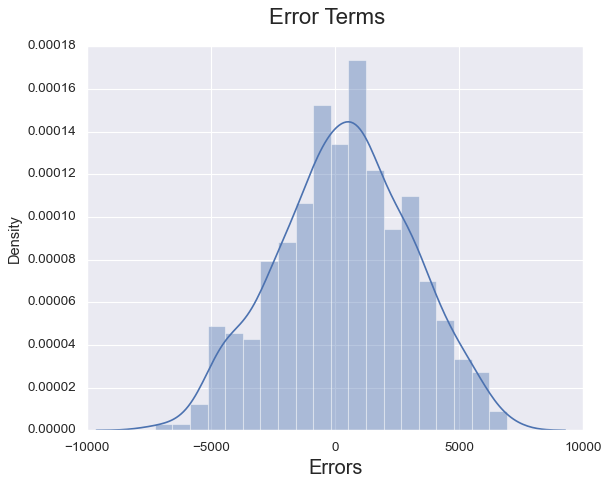

In [1429]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

- As seen from the above graph. the error is normally distributed and has mean as 0. 

### Step 7: Predict using model and Evaluate the results

Use the model built to get the values for bike demand on the test dataset

In [1430]:
y_train_pred=res1.predict(X_train_sm)
y_test_pred=res1.predict(X_test_sm)

In [1431]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3), "Test:",round(r2_test,3))

Train: 0.902 Test: 0.866


- The model accuracy with train data was <b>90.2%</b>. The model accuracy with test data is <b>86.6%. 

Text(0, 0.5, 'y_pred')

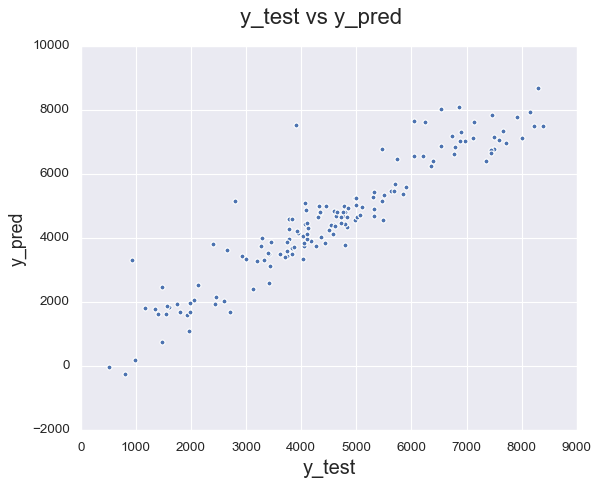

In [1432]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

##### Trail runs with different # of features and compared the R2 values


  Features --- R2_train --- R2_test <br>
         13 --- 0.908 --- 0.858 <br>
         12 --- 0.907 --- 0.857 <br>
         10 --- 0.905 --- 0.86  <br>
         09 --- 0.902 --- 0.866  <br>
         08 --- 0.894 --- 0.857 <br>

####  Hence the model with 9 features is providing the best results. The test accuracy is at 86.6%

The features are:
  - Casual
  - year
  - workingday
  - season
  - Feeling Temperature
  - WeatherSit

The formula for linear regrssion model for bike demand is: <br>
<br>
<b>Demand(cnt) = 4505.2671  +  692.3536(workingday)  +  426.8082(atemp)  +  1063.4212(casual) +  
235.8335(season_summer)  +  279.4398(season_fall)  +  543.4504(season_winter) -  177.3723(weatersit_Misty) -  291.2680(weather_LightSnowRain)  +  792.8863(yr)<b>



